In [5]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd


# 1) 데이터 로드 & 분할
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.25, random_state=1, stratify=wine.target
)


In [5]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df['target'].value_counts())
df.head()

target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


Accuracy: 0.9333333333333333


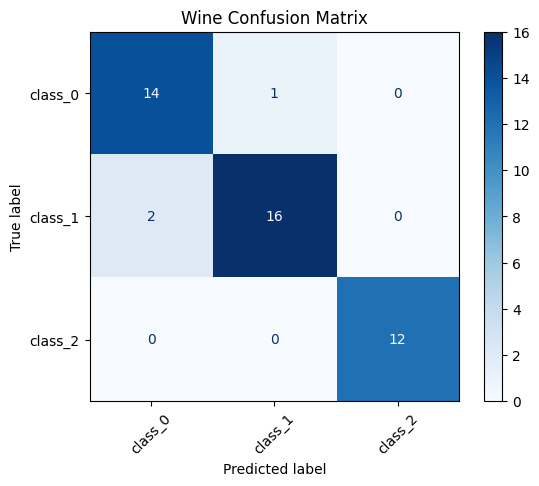

In [3]:

# 2) max_depth=3 로 모델 학습
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X_train, y_train)


In [6]:

# 3) 평가
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print('Classification Report')
print(classification_report(
    y_test, y_pred
))


Accuracy: 0.9333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.94      0.89      0.91        18
           2       1.00      1.00      1.00        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [ ]:

# 4) 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=wine.target_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Wine Confusion Matrix")
plt.show()


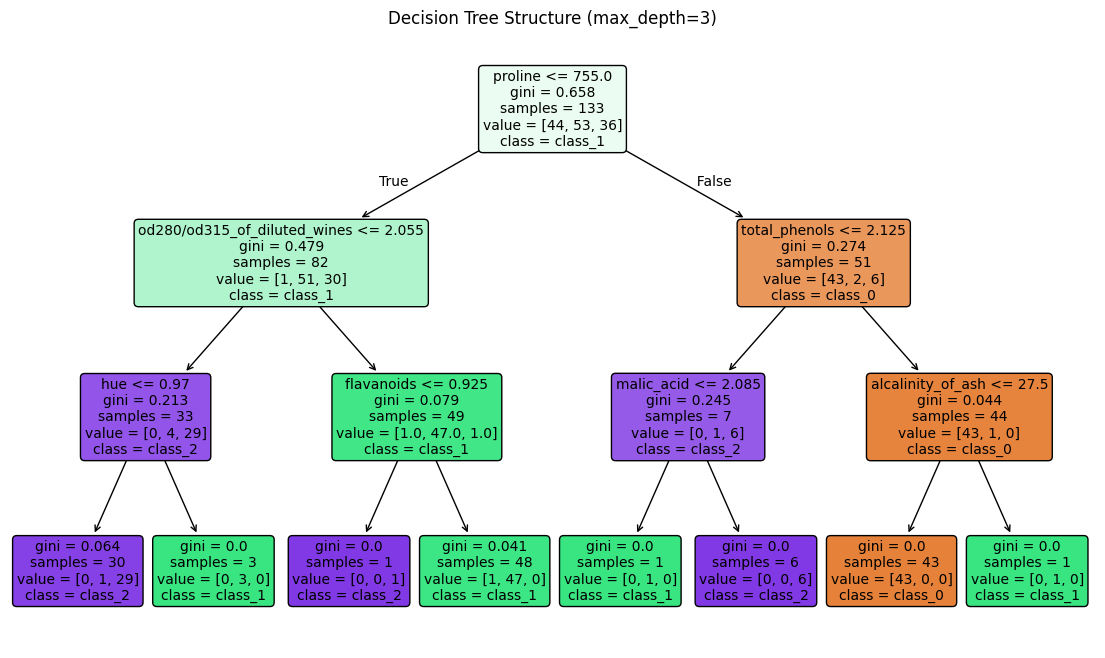

In [11]:
plt.figure(figsize=(14,8))
plot_tree(
    clf,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure (max_depth=3)")
plt.show()  

## Specificity (TN / (TN + FP)) 계산

In [7]:

total = cm.sum()
specificities = {}
for i, label in enumerate(wine.target_names):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    specificities[label] = TN / (TN + FP)

print("Specificity per class:")
for label, spec in specificities.items():
    print(f"  {label:>10}: {spec:.3f}")

Specificity per class:
     class_0: 0.933
     class_1: 0.963
     class_2: 1.000
